<a href="https://colab.research.google.com/github/HANISY/FastCampus-EXPORT-Data-Analysis/blob/main/Marketing_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Commerce / Marketing Data Analyst Preview Test - Advanced**
```
현재는 2021년, 가상의 홈쇼핑 기반 온라인 커머스 기업 ‘다잇다'의 데이터 분석가로 해당 서비스의 데이터 분석을 진행하려고 합니다.
```


## **Data Schema**
📑고객의 인적/구매 이력 정보 데이터 </br>

|Column|Description|
|:---|:---|
|customer_no|고객번호 (고객 식별 값, 보통 고유함)|
|| ※ 고객번호의 앞 여섯 자리는 고객의 가입연월을 의미함 (eg. 2019073300103 고객의 가입연월은 2019-07)|
|age |고객 연령|
|gender|고객 성별 (1 : 남성, 2 : 여성, 9 : 성별 알 수 없음)|
|order_no|주문 번호|
|order_date|주문 일자|
|channel|주문 채널 (TV, Mobile)|
|item_category|아이템 카테고리|
|item_code|아이템 코드|
|item_name|아이템명|
|price|판매가|
|qty|주문 수량|
|order_amount|주문 금액|
|discount_amount|할인 금액|
|paid_amount|고객 결제 금액|

In [ ]:
# CSV 파일 읽어오기
df = pd.read_csv('/content/drive/MyDrive/online_commerce_data.csv')
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021/06/17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021/06/02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


# **Data Preprocessing & Exploratory Data Analysis**

## 데이터 결측치 처리하기

In [ ]:
# 컬럼 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      147311 non-null  int64  
 1   age              147273 non-null  float64
 2   gender           147311 non-null  int64  
 3   order_no         147311 non-null  int64  
 4   order_date       147311 non-null  object 
 5   channel          147311 non-null  object 
 6   item_category    147311 non-null  object 
 7   item_code        147311 non-null  int64  
 8   item_name        147311 non-null  object 
 9   price            147311 non-null  int64  
 10  qty              147311 non-null  int64  
 11  order_amount     147311 non-null  int64  
 12  discount_amount  147311 non-null  int64  
 13  paid_amount      147311 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 15.7+ MB


In [ ]:
# order_date 컬럼을 datetime 타입으로 변환
df['order_date'] = pd.to_datetime(df['order_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_no      147311 non-null  int64         
 1   age              147273 non-null  float64       
 2   gender           147311 non-null  int64         
 3   order_no         147311 non-null  int64         
 4   order_date       147311 non-null  datetime64[ns]
 5   channel          147311 non-null  object        
 6   item_category    147311 non-null  object        
 7   item_code        147311 non-null  int64         
 8   item_name        147311 non-null  object        
 9   price            147311 non-null  int64         
 10  qty              147311 non-null  int64         
 11  order_amount     147311 non-null  int64         
 12  discount_amount  147311 non-null  int64         
 13  paid_amount      147311 non-null  int64         
dtypes: datetime64[ns](1)

In [ ]:
# age 컬럼의 결측치 확인
df[df['age'].isna()].head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
2479,2020042097533,NaN,9,202104014704079,2021-04-01,Mobile,일반식품,321981732,생수,3300,1,3300,0,3300
5977,2020120538186,NaN,9,202102051918006,2021-02-05,Mobile,일반식품,320105541,생수,5990,1,5990,0,5990
14980,2020110634881,NaN,9,202102122693785,2021-02-12,Mobile,일반식품,320105541,생수,6000,1,6000,0,6000
15457,2020042097533,NaN,9,202105011653115,2021-05-01,Mobile,일반식품,321981732,생수,3290,1,3290,0,3290
17504,2021027453851,NaN,9,202102010947124,2021-02-01,TV,일반식품,322547873,레드향세트,45900,1,45900,1000,44900


In [ ]:
# age 컬럼의 결측치 비율 계산
missing_percentage = (df['age'].isna().sum() / len(df['age'])) * 100
print(f"age 컬럼의 결측치 비율: {missing_percentage:.2f}%")

age 컬럼의 결측치 비율: 0.03%



```
결측치의 비율이 적기 때문에 유의미한 영향을 미치지 않을 것으로 판단하였습니다.
이에 따라 결측치가 있는 행을 별도로 분리한 후 age 컬럼을 정수형 타입으로 변경하였습니다.
```

In [ ]:
# age 컬럼에 결측치가 있는 행을 df_nan으로 저장
df_nan = df[df['age'].isna()]

# 결측치가 있는 행을 제외한 데이터프레임을 df에 저장
df = df.dropna(subset=['age'])

# age 컬럼을 int 타입으로 변환
df['age'] = df['age'].astype(int)

# 결과 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147273 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_no      147273 non-null  int64         
 1   age              147273 non-null  int64         
 2   gender           147273 non-null  int64         
 3   order_no         147273 non-null  int64         
 4   order_date       147273 non-null  datetime64[ns]
 5   channel          147273 non-null  object        
 6   item_category    147273 non-null  object        
 7   item_code        147273 non-null  int64         
 8   item_name        147273 non-null  object        
 9   price            147273 non-null  int64         
 10  qty              147273 non-null  int64         
 11  order_amount     147273 non-null  int64         
 12  discount_amount  147273 non-null  int64         
 13  paid_amount      147273 non-null  int64         
dtypes: datetime64[ns](1)

<ipython-input-9-8c5bd08027b4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


## 데이터 정보 확인하기


### 성별/연령별 구매 데이터 시각화

In [ ]:
#총 고객 수 확인
customer_count = df['customer_no'].nunique()
print("총 가입 고객 수는", customer_count, "명입니다")

총 가입 고객 수는 72031 명입니다


```
한 고객 당 1번 이상의 주문 이력을 가지고 있다는 것을 파악할 수 있습니다.
```

In [ ]:
# 데이터 내 고객 연령 확인
print("고객 연령은", df['age'].min(), "세 부터", df['age'].max(), "세 까지입니다")

고객 연령은 15 세 부터 149 세 까지입니다


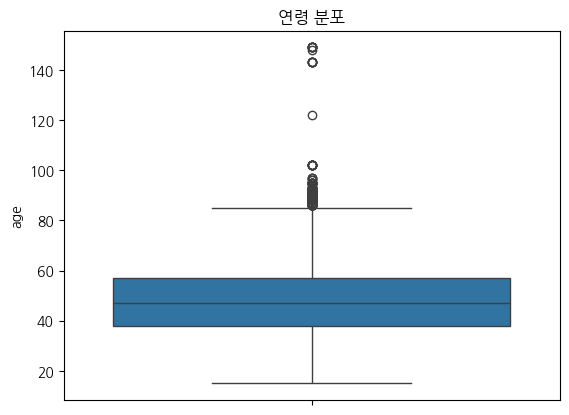

100세 이상 고객의 수: 26 명입니다


In [ ]:
# age 컬럼의 박스플롯 그리기
sns.boxplot(df['age'])
plt.title('연령 분포')
plt.show()

# 100세 이상 고객의 수 확인
age_100 = df[df['age'] >= 100].shape[0]
print("100세 이상 고객의 수:", age_100, "명입니다")

```
100세 이상의 고객을 제외하고 연령대별로 구분하였습니다.
```

In [ ]:
# 100세 미만 고객으로 데이터 프레임 수정
df = df[df['age'] < 100]

# 연령별 그룹 생성
def age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    elif age < 70:
        return '60대'
    elif age < 80:
        return '70대'
    else:
        return '80대 이상'

df['age_group'] = df['age'].apply(age_group)
df.head()

<ipython-input-13-e4e591560154>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = df['age'].apply(age_group)


,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group
0,2021059651101,68,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,60대
1,2018069800502,49,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,40대
2,2019073300103,35,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,30대
3,2020075283364,41,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,40대
4,2020104780765,46,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,40대


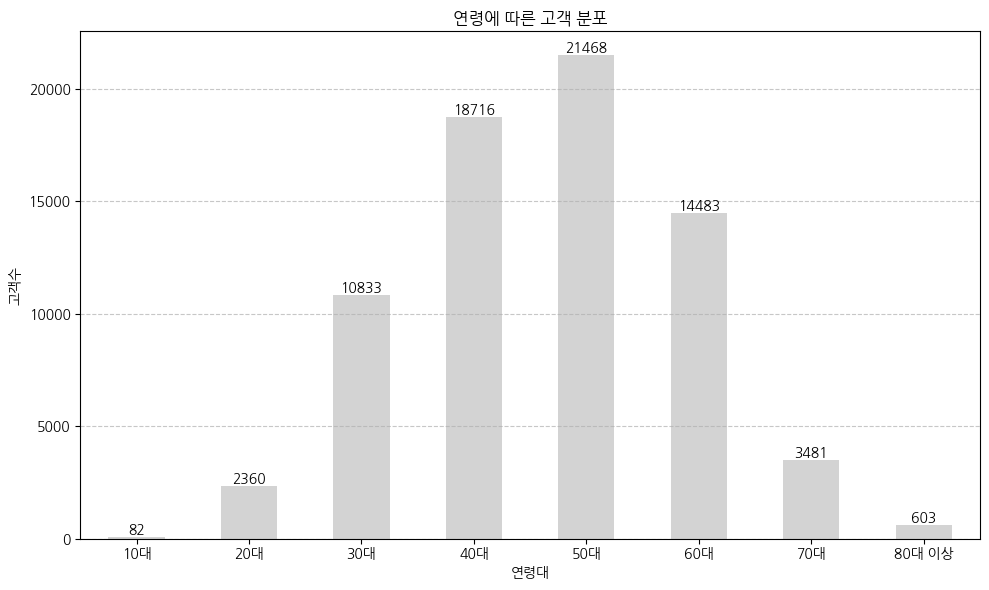

In [ ]:
# 중복된 고객 번호를 제외하고 고객 수 계산
unique_customers = df.drop_duplicates(subset='customer_no')

# 연령그룹별로 카운트
age_group_counts = unique_customers['age_group'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='lightgrey')

# 막대 위에 고객 수 표시
for i, count in enumerate(age_group_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('연령에 따른 고객 분포')
plt.xlabel('연령대')
plt.ylabel('고객수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

```
연령대별 고객 수는 50대가 가장 많으며, 40대, 60대 순으로 많이 분포하고 있습니다.
```

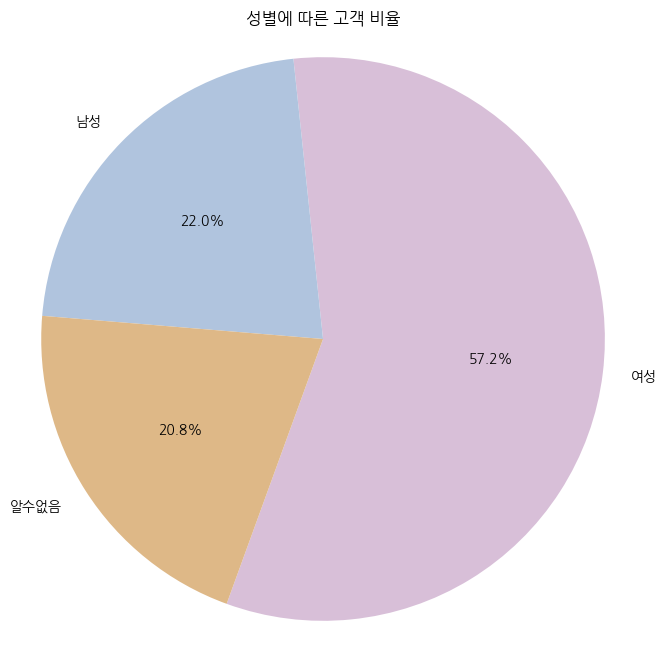

성별에 따른 고객 수:
여성: 41222명
남성: 15855명
알수없음: 14949명


In [ ]:
# 성별을 나타내는 코드 추가
gender_mapping = {1: '남성', 2: '여성', 9: '알수없음'}
df['gender'] = df['gender'].map(gender_mapping)

# 중복된 고객 번호를 제외하고 고객 수 계산
unique_customers = df.drop_duplicates(subset='customer_no')

# 성별에 따른 고객 수 계산
gender_counts = unique_customers['gender'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=250, colors=['thistle', 'lightsteelblue', 'burlywood'])
plt.title('성별에 따른 고객 비율')
plt.axis('equal')  # 원형을 유지하기 위해 가로축과 세로축을 동일하게 설정
plt.show()

# 성별에 따른 고객 수 출력
print("성별에 따른 고객 수:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count}명")

```
여성 고객 수가 남성 고객 수보다 약 2.6배 많은 것을 확인할 수 있습니다.
```

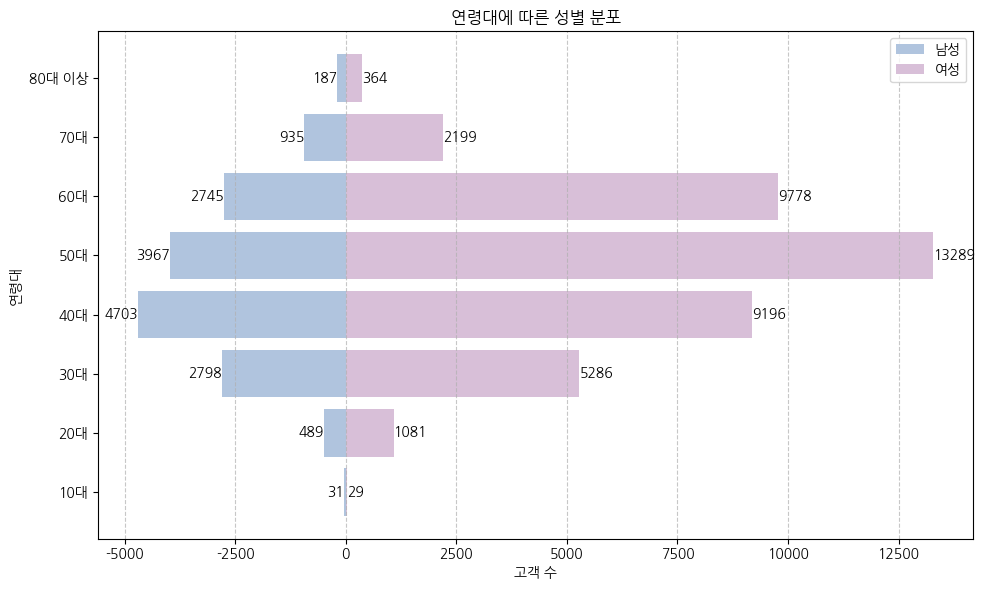

In [ ]:
# 중복된 고객 번호를 제외하고 고객 수 계산
unique_customers = df.drop_duplicates(subset='customer_no')

# 연령그룹과 성별에 따른 고객 수 계산
age_gender_counts = unique_customers.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

# 인구 피라미드 그리기
labels = age_gender_counts.index
male_counts = age_gender_counts['남성']
female_counts = age_gender_counts['여성']

fig, ax = plt.subplots(figsize=(10, 6))

# Female
bars1 = ax.barh(labels, female_counts, color='thistle', label='여성')
# Male
bars2 = ax.barh(labels, -male_counts, color='lightsteelblue', label='남성')

ax.set_xlabel('고객 수')
ax.set_ylabel('연령대')
ax.set_title('연령대에 따른 성별 분포')

# 막대 위에 고객 수 표시
for bar in bars1:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', ha='left', fontsize=10)
for bar in bars2:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(-width)}', va='center', ha='right', fontsize=10)

# 범례 순서 변경
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

```
여성은 50대 > 60대 > 40대 > 30대 순으로 많이 분포하며,
남성은 40대 > 50대 > 30대 > 60대 순으로 많이 분포하는 것을 알 수 있습니다.
```

####각 고객의 주문 경과일수 및 구매주기 확인

In [ ]:
# 데이터 내 주문 기간 확인
print("주문 기간 :", df['order_date'].min(), "부터", df['order_date'].max(), "까지")

주문 기간 : 2021-01-01 00:00:00 부터 2021-06-24 00:00:00 까지


In [ ]:
# 고객별로 첫 번째 주문일과 마지막 주문일, 주문 횟수를 찾기
order = df.groupby('customer_no').agg(
    first_order_date=('order_date', 'min'),
    last_order_date=('order_date', 'max'),
    order_count=('order_date', 'count')
).reset_index()

# 결과 출력
order

,customer_no,first_order_date,last_order_date,order_count
0,2015010000596,2021-01-15,2021-06-03,2
1,2015010000652,2021-03-06,2021-03-06,1
2,2015010001152,2021-02-13,2021-05-25,6
3,2015010001213,2021-02-25,2021-02-25,1
4,2015010001954,2021-03-03,2021-03-03,1
...,...,...,...,...
72021,2021069984125,2021-06-04,2021-06-04,1
72022,2021069986151,2021-06-04,2021-06-04,1
72023,2021069994005,2021-06-08,2021-06-08,1
72024,2021069994853,2021-06-04,2021-06-04,1


In [ ]:
# 2021년 6월 24일과 첫 번째 주문일 사이의 주문 경과일수 계산
order['elapsed_days'] = (pd.to_datetime('2021-06-24') - order['first_order_date']).dt.days

# 주문 주기 계산 (평균 주문 주기 = 주문 경과일수 / 주문 횟수)
order['order_cycle'] = order['elapsed_days'] / order['order_count']

# 결과 출력
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72026 entries, 0 to 72025
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_no       72026 non-null  int64         
 1   first_order_date  72026 non-null  datetime64[ns]
 2   last_order_date   72026 non-null  datetime64[ns]
 3   order_count       72026 non-null  int64         
 4   elapsed_days      72026 non-null  int64         
 5   order_cycle       72026 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.3 MB


In [ ]:
# order_cycle 컬럼을 int 타입으로 변환
order['order_cycle'] = order['order_cycle'].astype(int)

# 결과 출력
order

,customer_no,first_order_date,last_order_date,order_count,elapsed_days,order_cycle
0,2015010000596,2021-01-15,2021-06-03,2,160,80
1,2015010000652,2021-03-06,2021-03-06,1,110,110
2,2015010001152,2021-02-13,2021-05-25,6,131,21
3,2015010001213,2021-02-25,2021-02-25,1,119,119
4,2015010001954,2021-03-03,2021-03-03,1,113,113
...,...,...,...,...,...,...
72021,2021069984125,2021-06-04,2021-06-04,1,20,20
72022,2021069986151,2021-06-04,2021-06-04,1,20,20
72023,2021069994005,2021-06-08,2021-06-08,1,16,16
72024,2021069994853,2021-06-04,2021-06-04,1,20,20


In [ ]:
merge_order = pd.merge(df, order, how='left', on='customer_no')
merge_order.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group,first_order_date,last_order_date,order_count,elapsed_days,order_cycle
0,2021059651101,68,알수없음,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,60대,2021-06-07,2021-06-07,1,17,17
1,2018069800502,49,여성,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,40대,2021-05-31,2021-05-31,1,24,24
2,2019073300103,35,남성,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,30대,2021-01-11,2021-06-08,1132,164,0
3,2020075283364,41,알수없음,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,40대,2021-06-17,2021-06-23,3,7,2
4,2020104780765,46,남성,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,40대,2021-06-02,2021-06-02,2,22,11


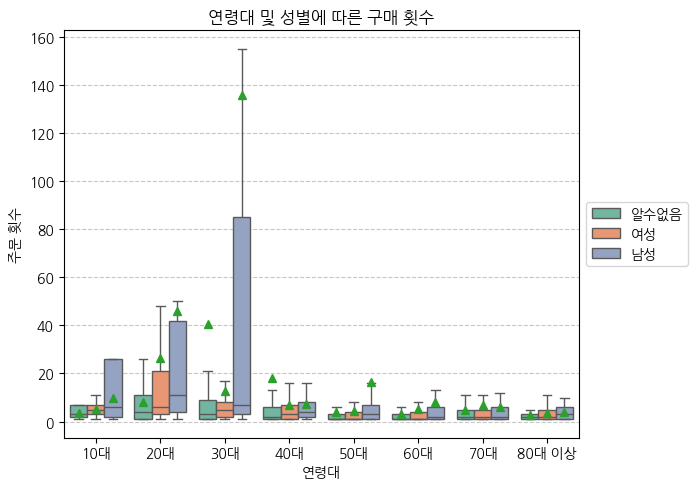

In [ ]:
# 연령대의 순서를 정의합니다.
age_group_order = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상']

# 순서대로 정의된 연령대 카테고리를 지정하여 데이터프레임을 재정렬합니다.
merge_order['age_group'] = pd.Categorical(merge_order['age_group'], categories=age_group_order, ordered=True)

# 박스플롯 그리기 (이상치를 제외한 결과만 표시)
plt.figure(figsize=(6, 5))

sns.boxplot(data=merge_order, x='age_group', y='order_count', hue='gender', palette='Set2', showfliers=False, showmeans=True)
plt.title('연령대 및 성별에 따른 구매 횟수')
plt.xlabel('연령대')
plt.ylabel('주문 횟수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 범례를 밖으로 이동
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

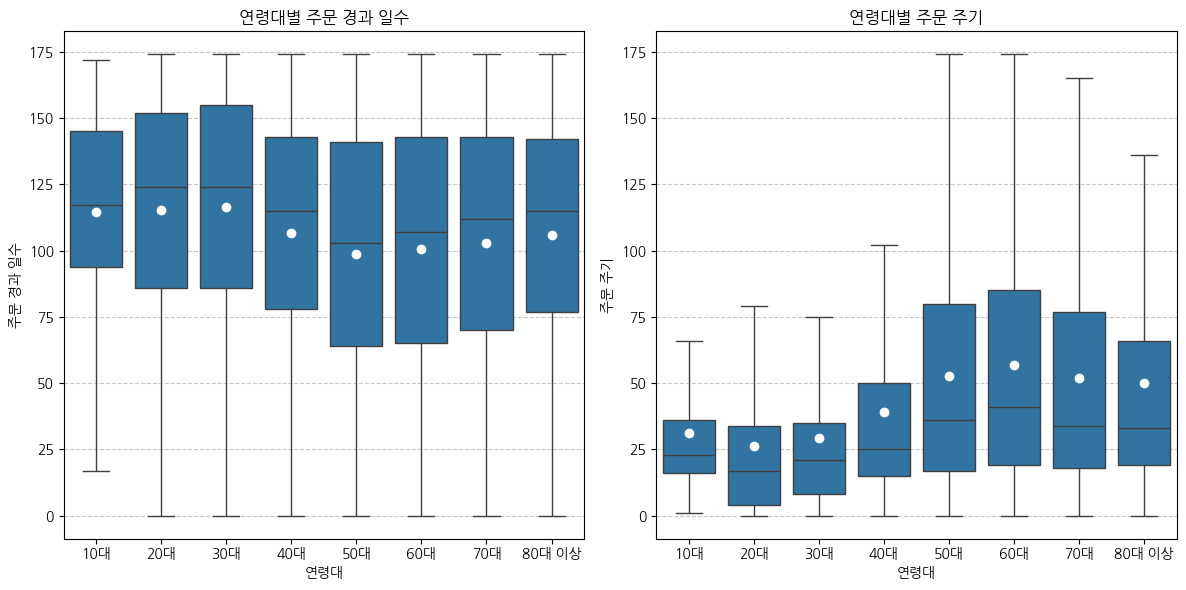

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(12, 6))

#1 연령대별 주문 경과 일수 (이상치를 제외한 결과만 표시)
plt.subplot(1, 2, 1)
sns.boxplot(data=merge_order, x='age_group', y='elapsed_days', showfliers=False,
            showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'white'})
plt.title('연령대별 주문 경과 일수')
plt.xlabel('연령대')
plt.ylabel('주문 경과 일수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 연령대별 주문 주기 (이상치를 제외한 결과만 표시)
plt.subplot(1, 2, 2)
sns.boxplot(data=merge_order, x='age_group', y='order_cycle', showfliers=False,
            showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'white'})
plt.title('연령대별 주문 주기')
plt.xlabel('연령대')
plt.ylabel('주문 주기')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

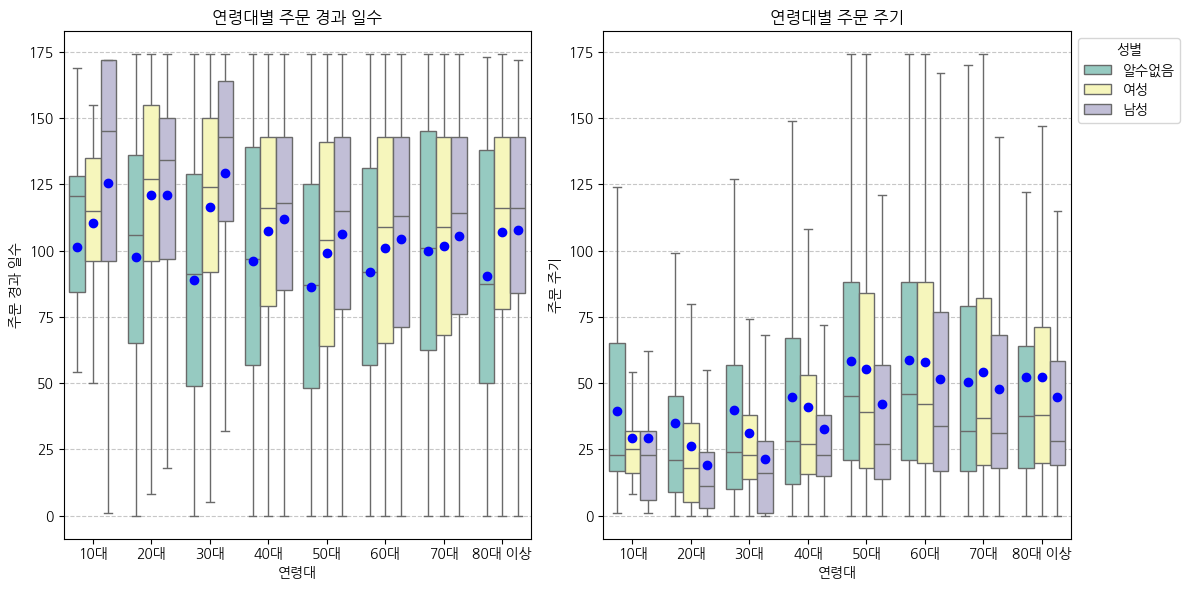

In [ ]:
# 박스플롯 그리기
plt.figure(figsize=(12, 6))

#1 성별에 따른 연령대별 주문 경과 일수 (이상치를 제외한 결과만 표시)
plt.subplot(1, 2, 1)
sns.boxplot(data=merge_order, x='age_group', y='elapsed_days', hue='gender', palette='Set3', showfliers=False,
            showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'blue', 'markeredgecolor':'blue'})
plt.title('연령대별 주문 경과 일수')
plt.xlabel('연령대')
plt.ylabel('주문 경과 일수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend().remove()

# 성별에 따른 연령대별 주문 주기 (이상치를 제외한 결과만 표시)
plt.subplot(1, 2, 2)
sns.boxplot(data=merge_order, x='age_group', y='order_cycle', hue='gender',palette='Set3', showfliers=False,
            showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'blue', 'markeredgecolor':'blue'})
plt.title('연령대별 주문 주기')
plt.xlabel('연령대')
plt.ylabel('주문 주기')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='성별', bbox_to_anchor=(1, 1))  # 범례를 밖으로 이동

plt.tight_layout()
plt.show()

####각 고객의 2021년 기준 가입기간 확인

In [ ]:
# 고객의 가입연월을 의미하는 join_date 컬럼 생성
merge_order['join_date'] = merge_order['customer_no'].astype(str).str[:6]

# 가입연월별 그룹 나누기
merge_order['member_period'] = pd.to_datetime('2021-01-01') - pd.to_datetime(merge_order['join_date'], format='%Y%m')
merge_order['member_period'] = (merge_order['member_period'] / np.timedelta64(1, 'D')).astype(int) // 30

# 가입기간별 그룹으로 나누기
def period_group(period):
    if period < 12:
        return '1년 이내'
    elif 12 <= period < 24:
        return '1-2년'
    elif 24 <= period < 36:
        return '2-3년'
    else:
        return '3년 이상'

merge_order['member_period_group'] = merge_order['member_period'].apply(period_group)
merge_order.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,...,paid_amount,age_group,first_order_date,last_order_date,order_count,elapsed_days,order_cycle,join_date,member_period,member_period_group
0,2021059651101,68,알수없음,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,...,44910,60대,2021-06-07,2021-06-07,1,17,17,202105,-4,1년 이내
1,2018069800502,49,여성,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,...,38000,40대,2021-05-31,2021-05-31,1,24,24,201806,31,2-3년
2,2019073300103,35,남성,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,...,116400,30대,2021-01-11,2021-06-08,1132,164,0,201907,18,1-2년
3,2020075283364,41,알수없음,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,...,165080,40대,2021-06-17,2021-06-23,3,7,2,202007,6,1년 이내
4,2020104780765,46,남성,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,...,43610,40대,2021-06-02,2021-06-02,2,22,11,202010,3,1년 이내


In [ ]:
# 가입일자에 일자를 추가하여 연월일 형식으로 변환
merge_order['join_date'] = pd.to_datetime(merge_order['join_date'].astype(str) + '01', format='%Y%m%d')

# 가입일자부터 첫 구매까지 걸린 기간 계산
merge_order['time_to_first_order'] = (merge_order['order_date'] - merge_order['join_date']).dt.days

# 최솟값과 최댓값 확인
min_time_to_first_purchase = merge_order['time_to_first_order'].min()
max_time_to_first_purchase = merge_order['time_to_first_order'].max()

print("가입일자부터 첫 구매까지 걸린 기간은 최소", min_time_to_first_purchase, "일 부터", "최대", max_time_to_first_purchase, "일 까지입니다.")

가입일자부터 첫 구매까지 걸린 기간은 최소 0 일 부터 최대 2353 일 까지입니다.


In [ ]:
# 가입일자와 첫 구매일자가 같은 사람 찾기
same_join_order_date = merge_order[merge_order['join_date'].dt.strftime('%Y-%m-%d') == merge_order['order_date'].dt.strftime('%Y-%m-%d')]

# 결과 출력
print("가입하자마자 구매한 사람은", len(same_join_order_date), "명 입니다")

가입하자마자 구매한 사람은 244 명 입니다


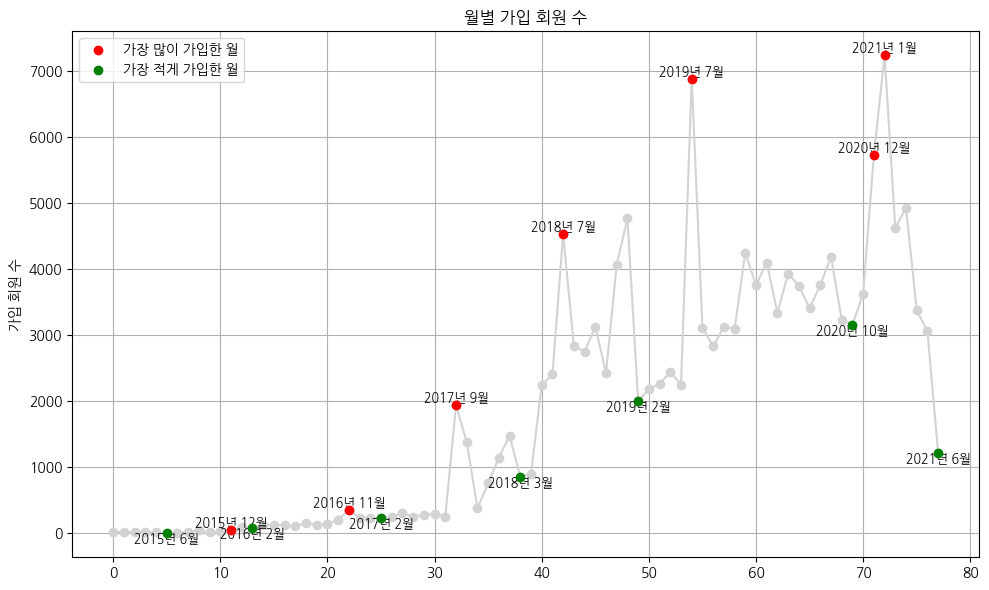

In [ ]:
# join_date 컬럼을 날짜 형식으로 변환하여 연도와 월을 추출
merge_order['join_date'] = pd.to_datetime(merge_order['join_date'], format='%Y%m')
merge_order['join_year'] = merge_order['join_date'].dt.year
merge_order['join_month'] = merge_order['join_date'].dt.month

# 연도별 각 월별 가입 회원 수 계산
monthly_join_counts = merge_order.groupby(['join_year', 'join_month']).size().reset_index(name='join_count')

# 연도별로 가장 많이 가입한 월과 가장 적게 가입한 월 찾기
max_join_month = monthly_join_counts.loc[monthly_join_counts.groupby('join_year')['join_count'].idxmax()]
min_join_month = monthly_join_counts.loc[monthly_join_counts.groupby('join_year')['join_count'].idxmin()]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(monthly_join_counts.index, monthly_join_counts['join_count'], marker='o', color='lightgrey')
plt.scatter(max_join_month.index, max_join_month['join_count'], color='red', label="가장 많이 가입한 월", zorder=5)
plt.scatter(min_join_month.index, min_join_month['join_count'], color='green', label="가장 적게 가입한 월", zorder=5)  # 따옴표 추가
plt.title('월별 가입 회원 수')
plt.ylabel('가입 회원 수')
plt.legend()

# 매년 가장 많이 가입한 월과 가장 적게 가입한 월 위에 연도와 월 표시
for index, row in max_join_month.iterrows():
    plt.text(index, row['join_count'], f"{row['join_year']}년 {row['join_month']}월", color='black', fontsize=9, ha='center', va='bottom')

for index, row in min_join_month.iterrows():
    plt.text(index, row['join_count'], f"{row['join_year']}년 {row['join_month']}월", color='black', fontsize=9, ha='center', va='top')

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.merge(df, merge_order[['customer_no', 'member_period_group']], on='customer_no', how='left')

# member_period_group 컬럼명을 member_period로 변경
df2.rename(columns={'member_period_group': 'member_period'}, inplace=True)
df2.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group,member_period
0,2021059651101,68,알수없음,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,60대,1년 이내
1,2018069800502,49,여성,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,40대,2-3년
2,2019073300103,35,남성,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,30대,1-2년
3,2019073300103,35,남성,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,30대,1-2년
4,2019073300103,35,남성,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,30대,1-2년


In [ ]:
# 가입기간별 전체 고객 수 계산
total_customers = merge_order['customer_no'].nunique()

# 가입기간 순서 설정
period_order = ['1년 이내', '1-2년', '2-3년', '3년 이상']

# 가입기간별 고객 수 계산
customer_counts_by_period = merge_order.groupby('member_period_group')['customer_no'].nunique()
customer_counts_by_period = customer_counts_by_period.reindex(period_order)

# 가입기간별 고객 수의 비율 계산 및 출력
for period, count in customer_counts_by_period.items():
    percentage = (count / total_customers) * 100
    print(f"- 가입기간이 {period}인 고객은 전체 고객의 {percentage:.2f}%입니다.")

- 가입기간이 1년 이내인 고객은 전체 고객의 50.00%입니다.
- 가입기간이 1-2년인 고객은 전체 고객의 22.94%입니다.
- 가입기간이 2-3년인 고객은 전체 고객의 19.82%입니다.
- 가입기간이 3년 이상인 고객은 전체 고객의 7.24%입니다.


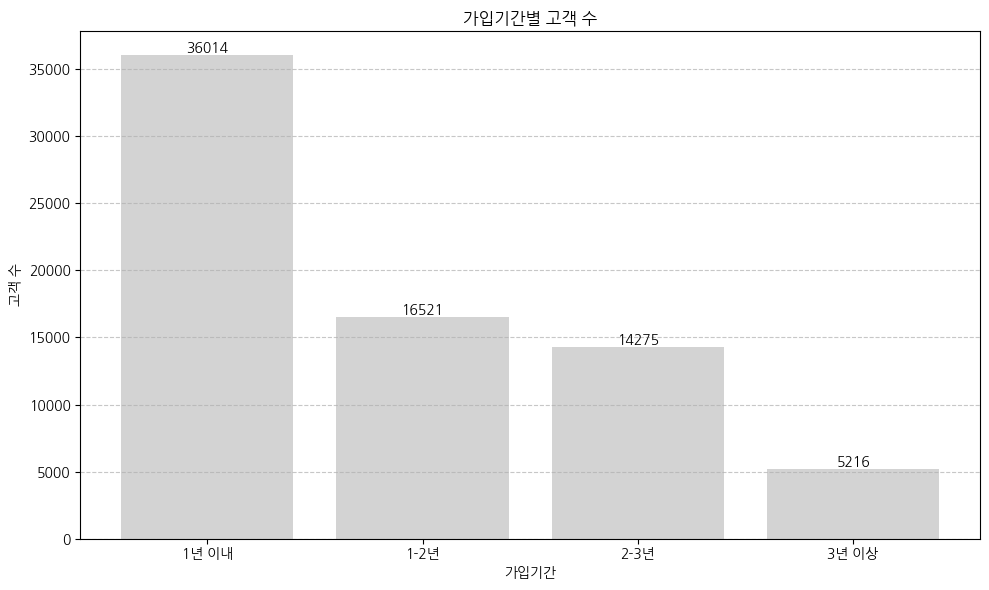

In [ ]:
# 가입기간별 고객 수 계산
customer_counts_by_period = merge_order.groupby('member_period_group')['customer_no'].nunique()

# 가입기간별 그룹 순서 설정
period_order = ['1년 이내', '1-2년', '2-3년', '3년 이상']
customer_counts_by_period = customer_counts_by_period.reindex(period_order)

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(customer_counts_by_period.index, customer_counts_by_period, color='lightgrey')
plt.title('가입기간별 고객 수')
plt.xlabel('가입기간')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 고객 수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

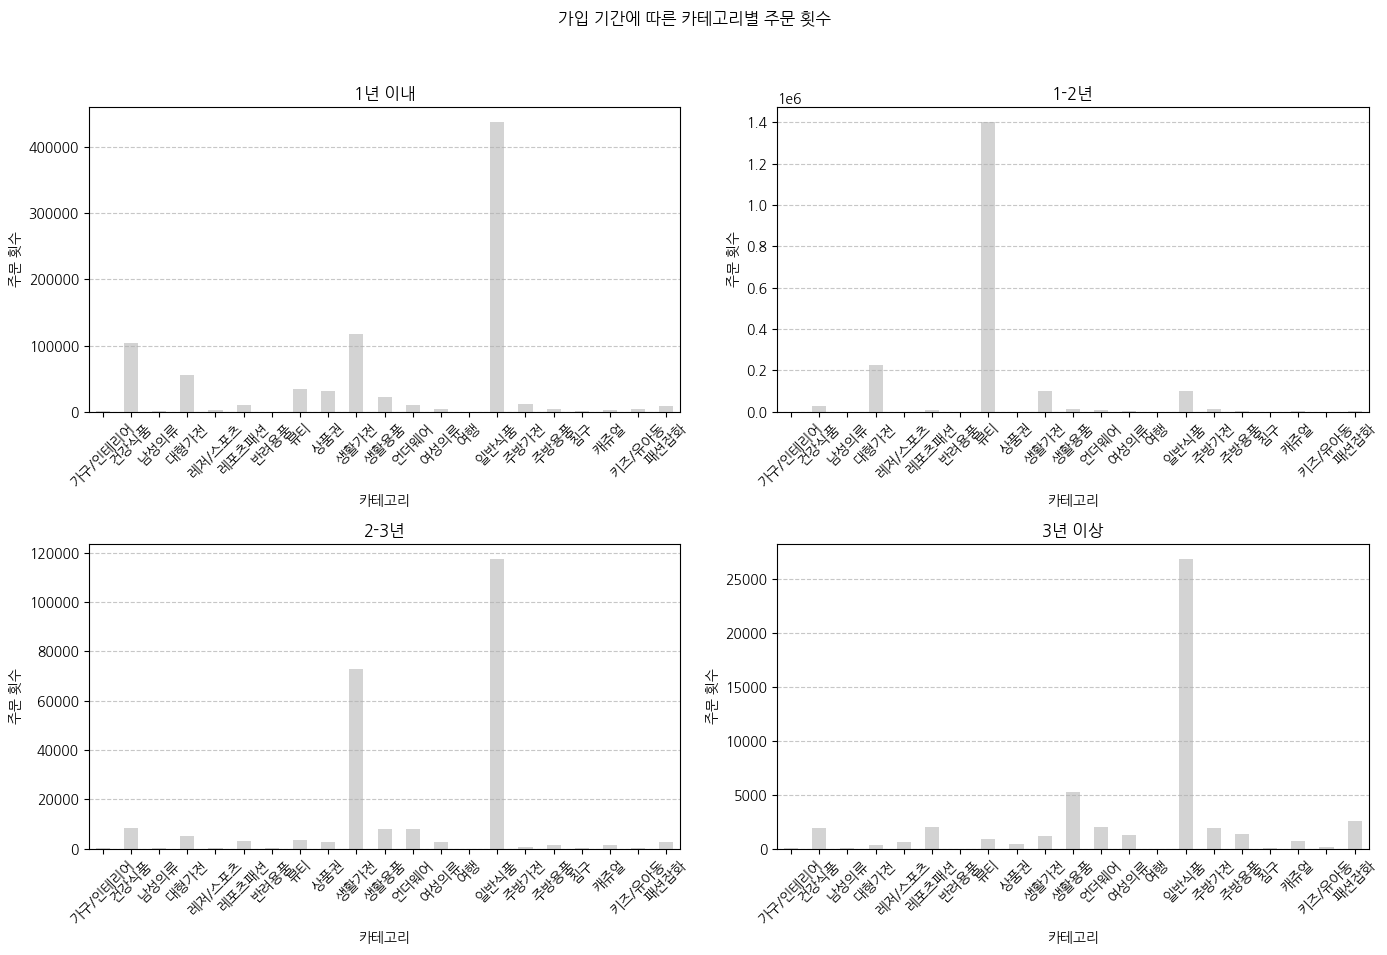

In [ ]:
# 가입기간에 따른 카테고리별 주문 횟수 계산
order_counts_by_period = df2.groupby(['member_period', 'item_category'])['order_no'].count().unstack()

# 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('가입 기간에 따른 카테고리별 주문 횟수')

# 가입기간별 그래프 그리기
for i, period_group in enumerate(period_order, 1):
    ax = axes[(i-1)//2][(i-1)%2]
    if period_group in order_counts_by_period.index:
        order_counts_by_period.loc[period_group].plot(kind='bar', ax=ax, color='lightgrey')
        ax.set_title(period_group)
        ax.set_xlabel('카테고리')
        ax.set_ylabel('주문 횟수')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticklabels(order_counts_by_period.columns, rotation=45)

# 레이아웃 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

```
가입 1년 이내 고객은 건강식품 구입이 많았고, 1-2년차 고객은 뷰티 상품, 2-3년차 고객은 생활가전 구입이 눈에 띄었습니다.
3년 이상 고객의 경우 패션잡화 구매가 늘었으며 생활용품도 많이 구매하였습니다.
```

###주문채널별 구매 데이터 시각화

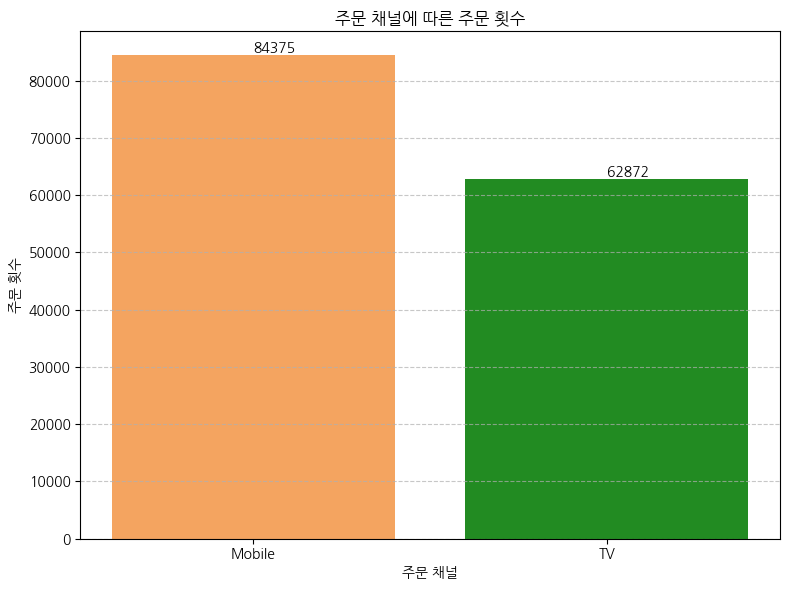

In [ ]:
# 주문채널별로 고객 수 계산
gender_counts = df['channel'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts, color=['sandybrown', 'forestgreen'])
plt.title('주문 채널에 따른 주문 횟수')
plt.xlabel('주문 채널')
plt.ylabel('주문 횟수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 주문 횟수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom')

plt.tight_layout()
plt.show()

```
Mobile로 구매한 횟수가 약 1.34배 높은 것을 확인할 수 있습니다.
```

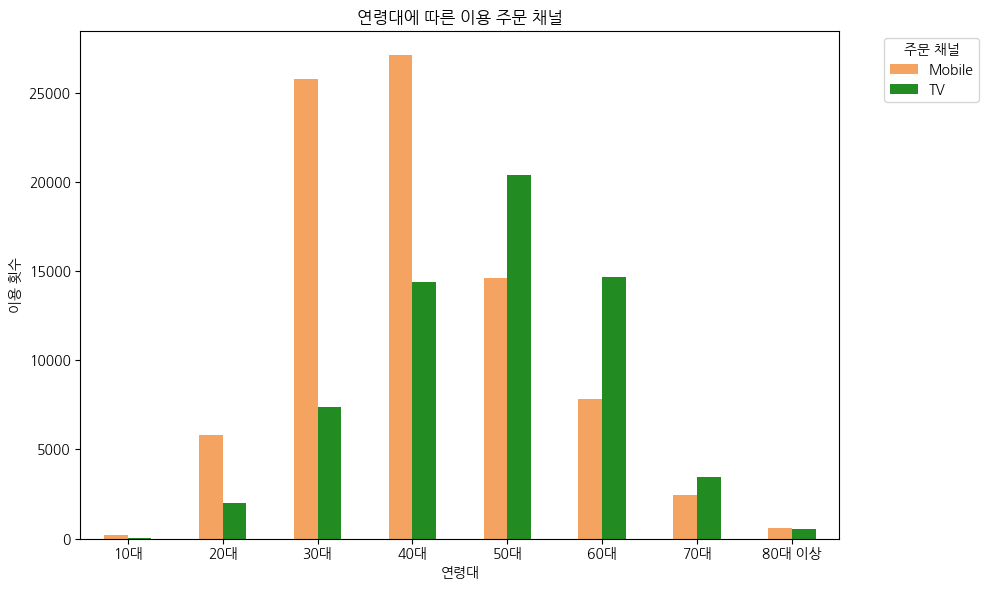

In [ ]:
# 연령대에 따른 주문 채널별 주문 횟수 계산
age_group_channel_counts = df.groupby(['age_group', 'channel']).size().unstack(fill_value=0)

# 그래프 그리기
age_group_channel_counts.plot(kind='bar', figsize=(10, 6), color=['sandybrown', 'forestgreen'])
plt.title('연령대에 따른 이용 주문 채널')
plt.xlabel('연령대')
plt.ylabel('이용 횟수')
plt.xticks(rotation=0)
plt.legend(title='주문 채널', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

```
50대 이상의 고객은 Mobile보다 TV를 통해 구매하는 횟수가 더 많은 것을 알 수 있습니다.
```

###카테고리별 구매 데이터 시각화


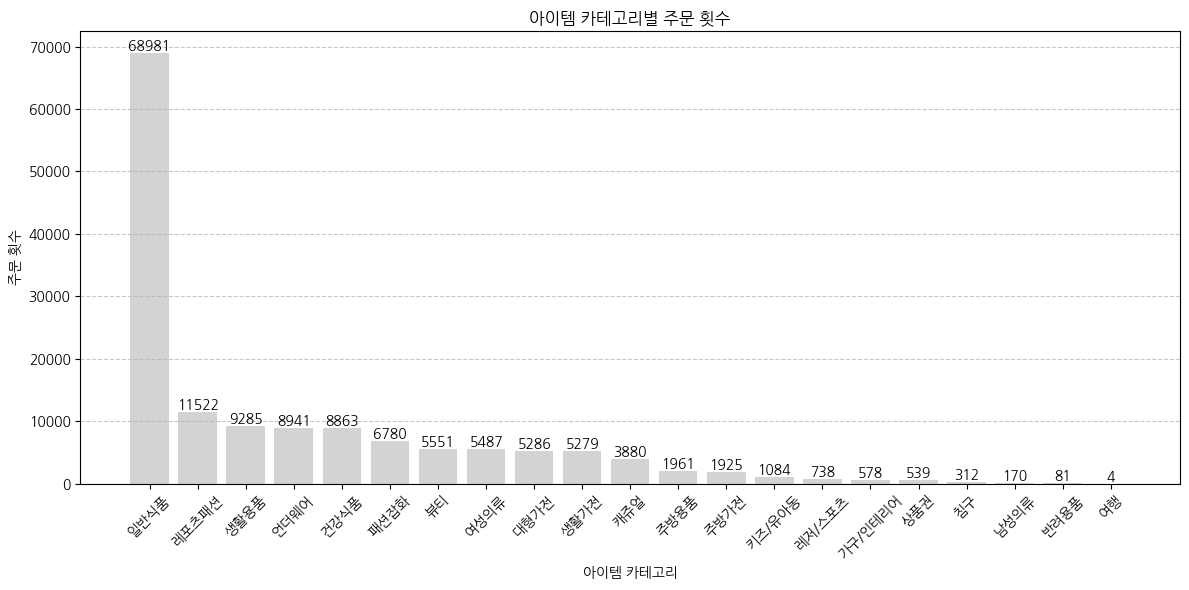

In [ ]:
# 아이템 카테고리별로 주문 횟수 계산
cat_counts = df['item_category'].value_counts()

# 그래프 그리기
plt.figure(figsize=(12, 6))
bars = plt.bar(cat_counts.index, cat_counts, color='lightgrey')
plt.title('아이템 카테고리별 주문 횟수')
plt.xlabel('아이템 카테고리')
plt.ylabel('주문 횟수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 주문 횟수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

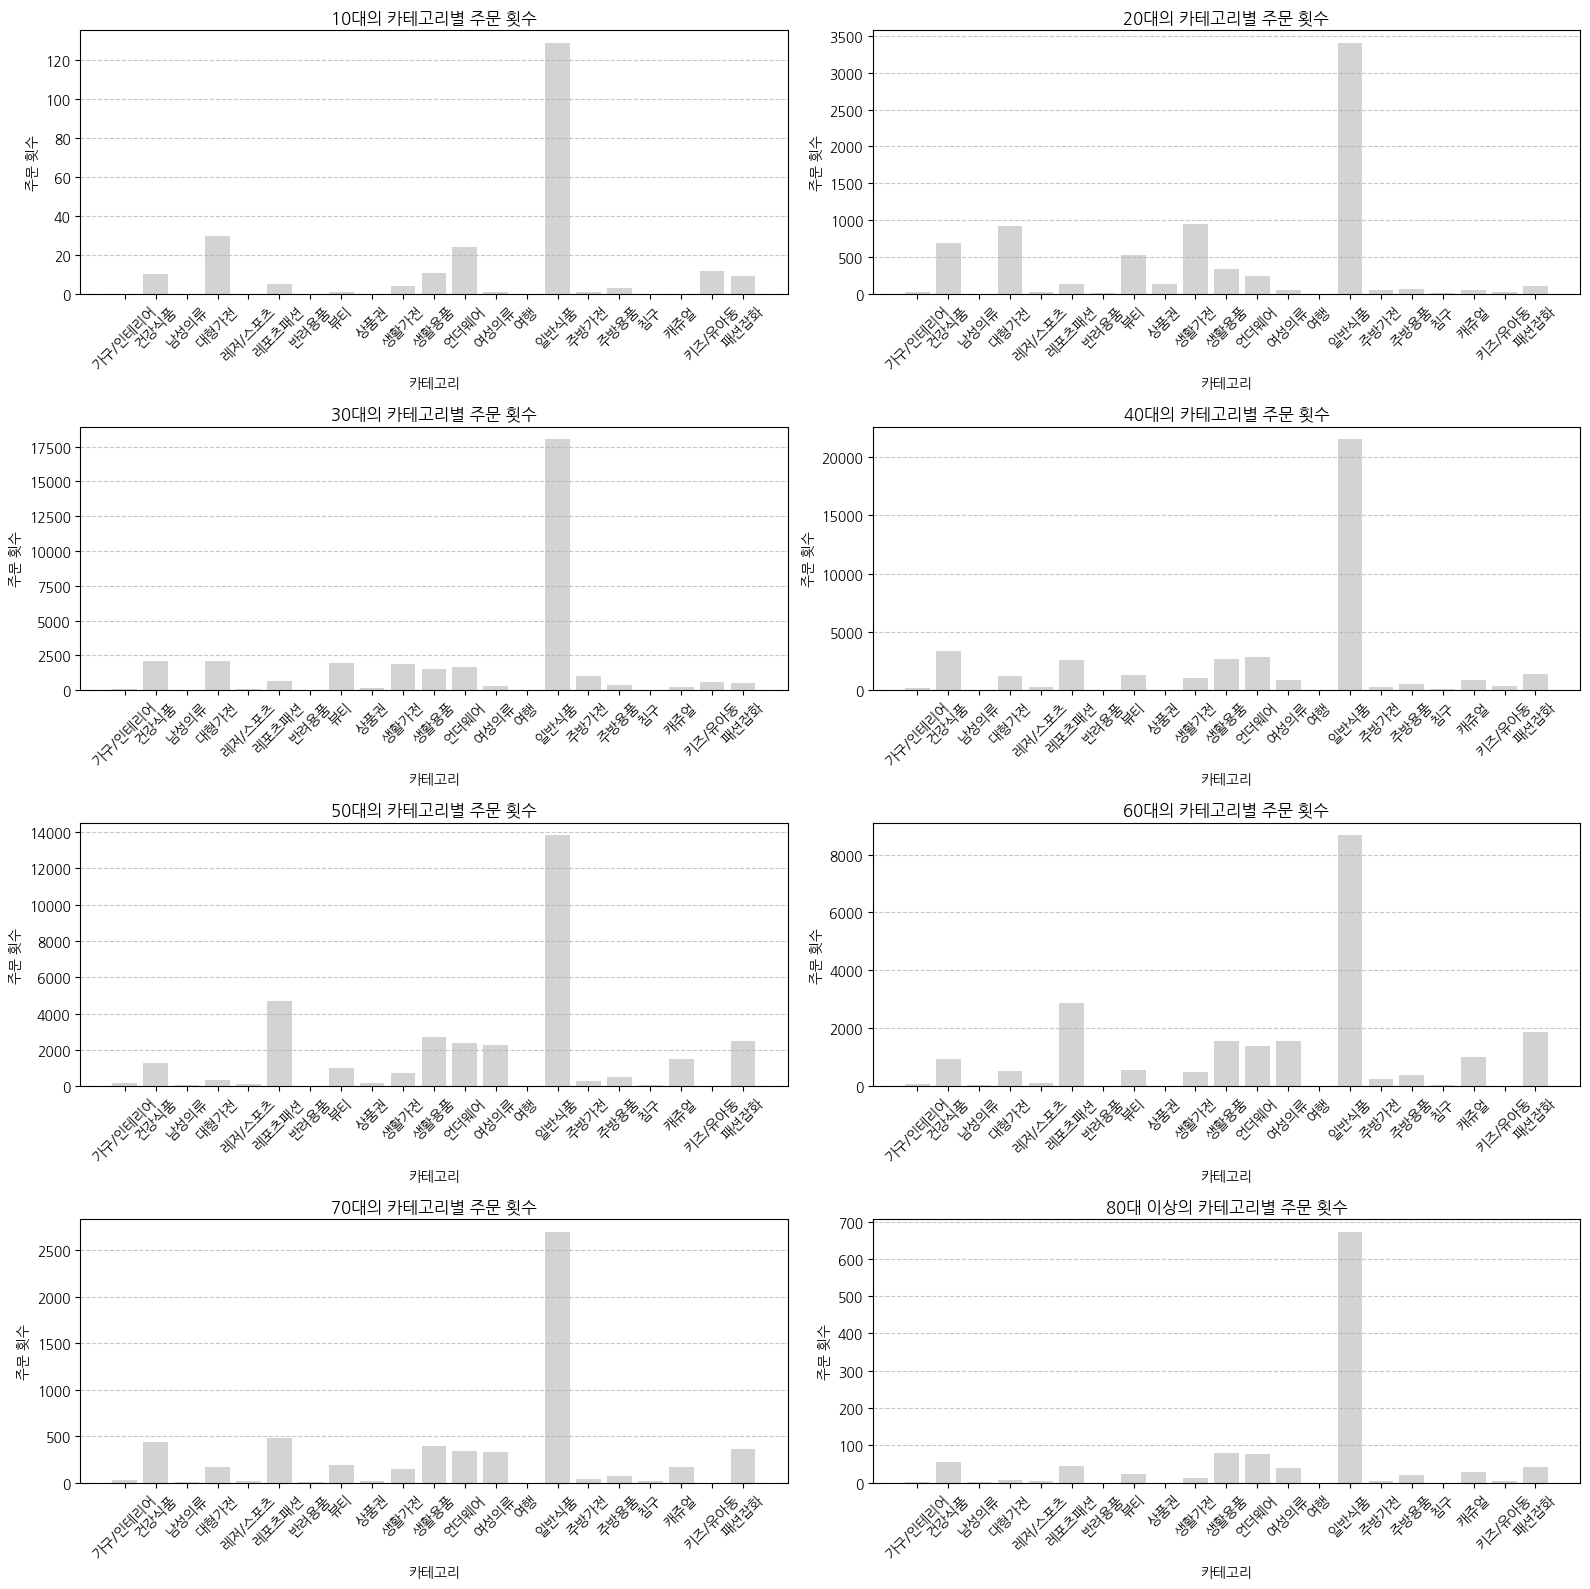

In [ ]:
# 연령대에 따른 카테고리별 주문 횟수 계산
age_group_cat_counts = df.groupby(['age_group', 'item_category']).size().unstack(fill_value=0)

# 그래프 그리기
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

for i, ax in enumerate(axes.flat):
    age_group = age_group_cat_counts.index[i]
    cat_counts = age_group_cat_counts.loc[age_group]
    ax.bar(cat_counts.index, cat_counts, color='lightgrey')
    ax.set_title(f'{age_group}의 카테고리별 주문 횟수')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('주문 횟수')
    ax.set_xticks(range(len(cat_counts.index)))  # 눈금 위치 설정
    ax.set_xticklabels(cat_counts.index, rotation=45)  # 눈금 레이블 설정
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

```
전체 연령에서 일반식품의 구매가 가장 많습니다.
20대는 건강식품, 40대 이상은 패션잡화, 50대 이상은 레포츠패션의 주문 횟수가 많은 것을 확인할 수 있습니다.
```

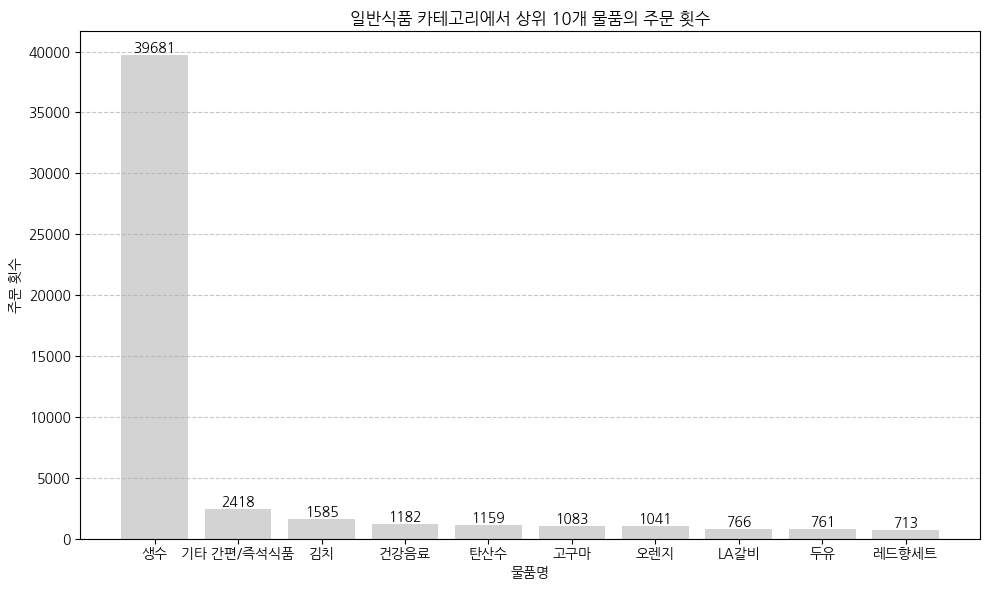

In [ ]:
# 'item_category'가 '일반식품'인 행들 필터링
order_food = df[df['item_category'] == '일반식품']

# 품목별 주문 횟수 계산
item_counts = order_food['item_name'].value_counts().head(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(item_counts.index, item_counts, color='lightgrey')
plt.title('일반식품 카테고리에서 상위 10개 물품의 주문 횟수')
plt.xlabel('물품명')
plt.ylabel('주문 횟수')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 구매횟수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

```
생수의 구매량이 가장 많은 것을 확인할 수 있습니다.
```

####카테고리별 매출 확인

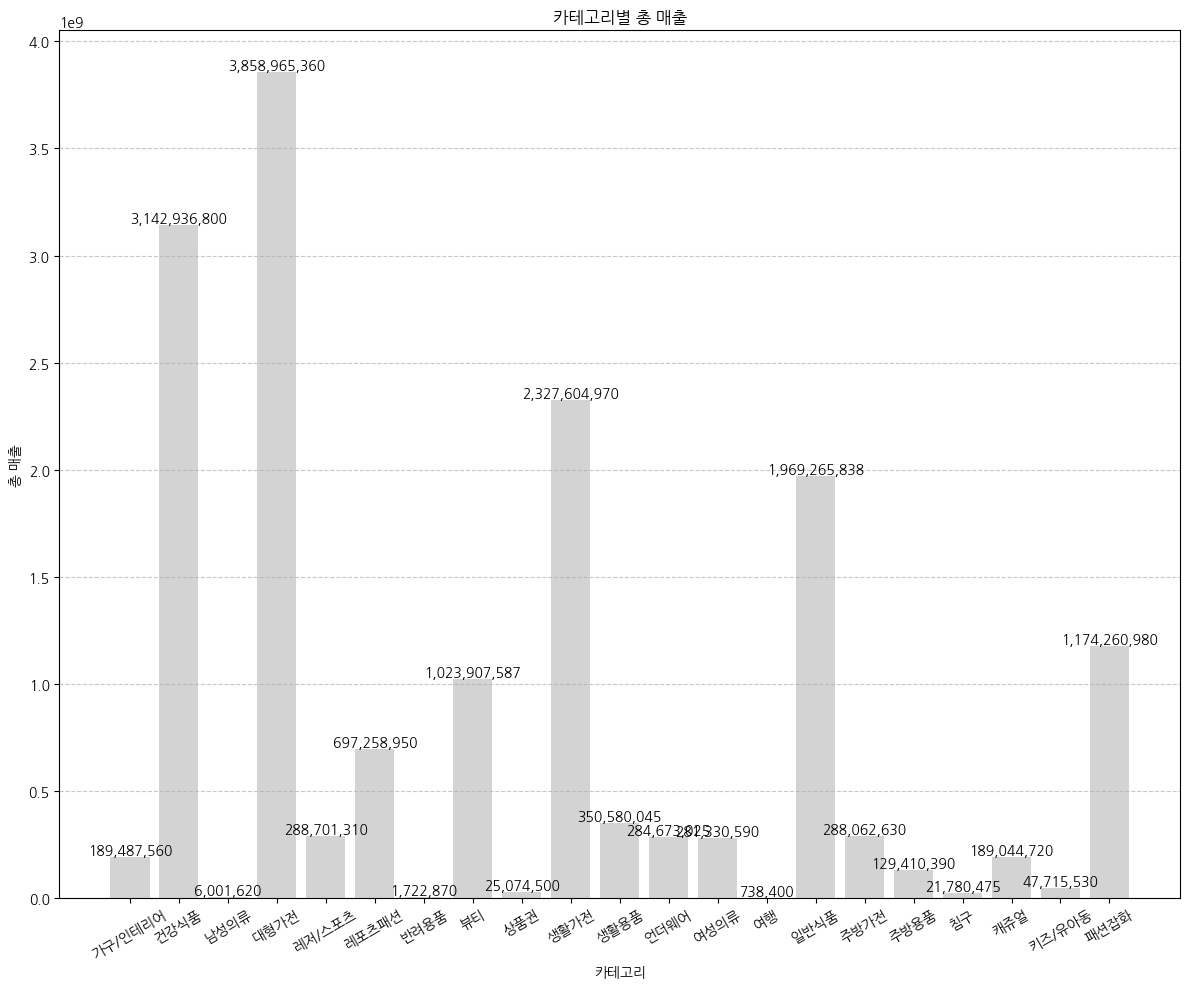

In [ ]:
# 카테고리별 총 매출 계산
category_sales = df.groupby('item_category')['paid_amount'].sum()

# 그래프 그리기
plt.figure(figsize=(12, 10))
bars = plt.bar(category_sales.index, category_sales, color='lightgrey')
plt.title('카테고리별 총 매출')
plt.xlabel('카테고리')
plt.ylabel('총 매출')
plt.xticks(rotation=30, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 총 매출 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.0f}'.format(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

```
대형가전의 총매출액이 제일 높고, 건강식품과 생활가전이 그 다음으로 높게 나타났습니다.
```

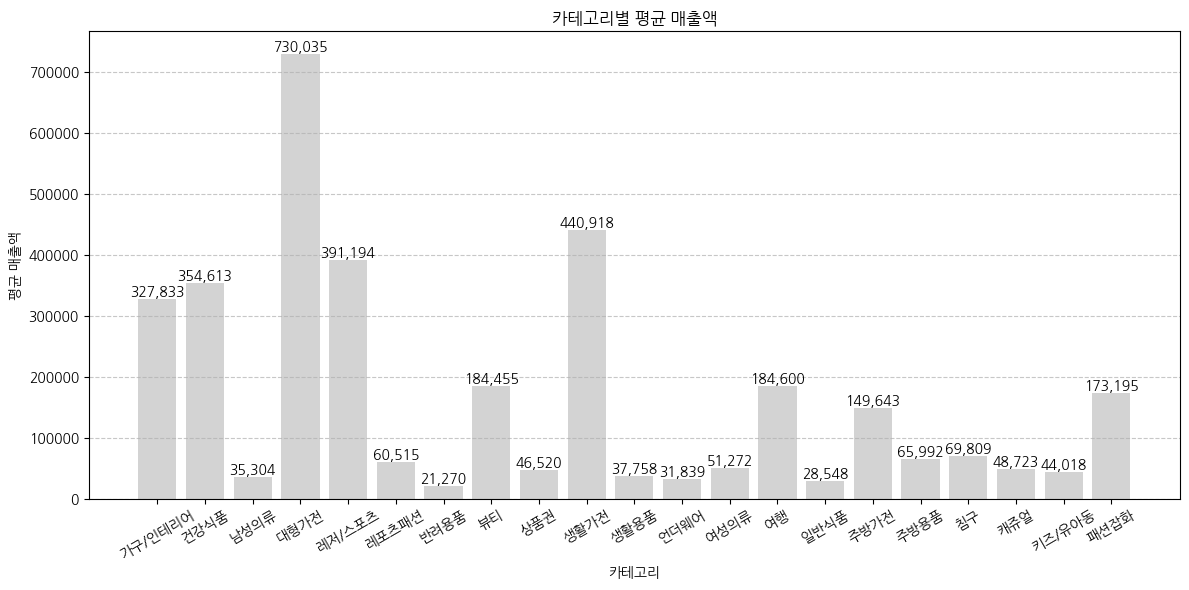

In [ ]:
# 카테고리별 평균 매출액 계산
category_avg_sales = df.groupby('item_category')['paid_amount'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
bars = plt.bar(category_avg_sales.index, category_avg_sales,color='lightgrey')
plt.title('카테고리별 평균 매출액')
plt.xlabel('카테고리')
plt.ylabel('평균 매출액')
plt.xticks(rotation=30, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 평균 매출액 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.0f}'.format(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

```
평균 매출액은 대형가전, 생활가전, 레저/스포츠 순서로 높게 나타났습니다.
```

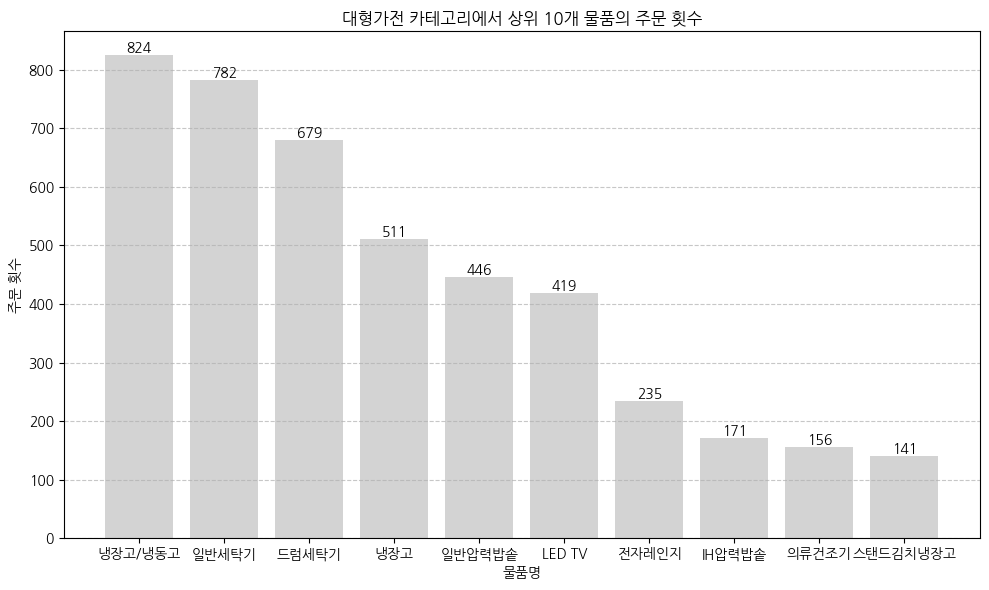

In [ ]:
# 'item_category'가 '대형가전'인 행들 필터링
order_food = df[df['item_category'] == '대형가전']

# 품목별 주문 횟수 계산
item_counts = order_food['item_name'].value_counts().head(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(item_counts.index, item_counts, color='lightgrey')
plt.title('대형가전 카테고리에서 상위 10개 물품의 주문 횟수')
plt.xlabel('물품명')
plt.ylabel('주문 횟수')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 구매횟수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

```
대형가전 카테고리에서는 냉장고/냉동고, 일반세탁기, 드럼세탁기 순으로 높은 판매량을 나타냈습니다.
```

###주문일자별 구매 데이터 시각화

In [ ]:
# 주문일자별 주문 횟수 계산
order_counts_by_date = df2.groupby('order_date').size()

# 주문일자별 주문 횟수의 최댓값과 최솟값 확인
max_order_count = order_counts_by_date.max()
min_order_count = order_counts_by_date.min()

# 주문 횟수가 가장 많았던 날과 가장 적었던 날 확인하기
max_order_date = order_counts_by_date.idxmax()
min_order_date = order_counts_by_date.idxmin()

# 결과 출력
print("주문횟수가 가장 많았던 날은", max_order_date, "로", max_order_count, "건 입니다")
print("주문횟수가 가장 적었던 날은", min_order_date, "로", min_order_count, "건 입니다")

주문횟수가 가장 많았던 날은 2021-05-15 00:00:00 로 166270 건 입니다
주문횟수가 가장 적었던 날은 2021-01-01 00:00:00 로 623 건 입니다


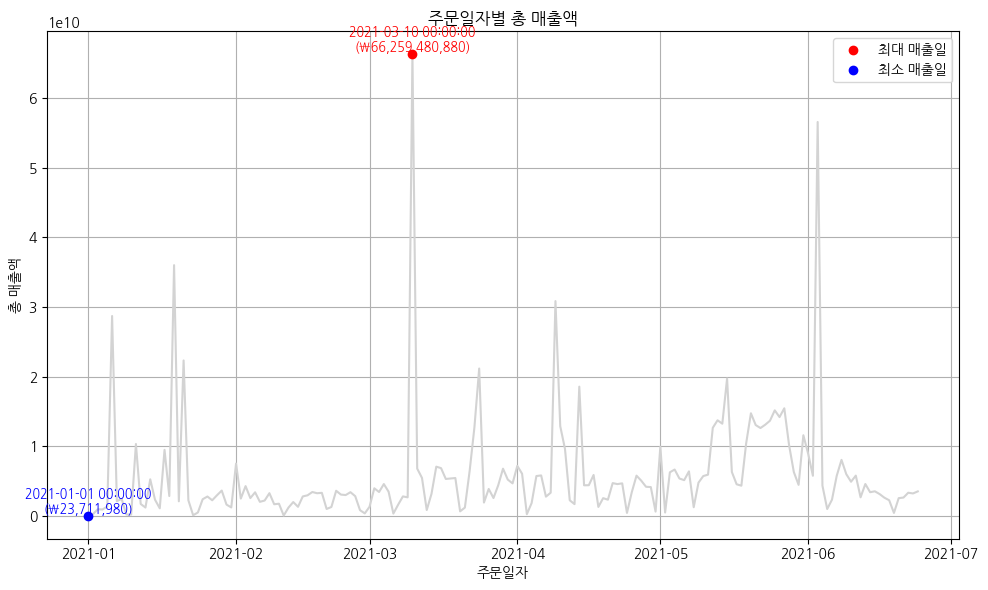

In [ ]:
# 주문일자별 총 매출액 계산
total_sales_by_date = df2.groupby('order_date')['paid_amount'].sum()

# 주문일자별 총 매출액의 최댓값과 최솟값 확인
max_sales_amount = total_sales_by_date.max()
min_sales_amount = total_sales_by_date.min()

# 총 매출액이 가장 많았던 날과 가장 적었던 날 확인하기
max_sales_date = total_sales_by_date.idxmax()
min_sales_date = total_sales_by_date.idxmin()

# 총 매출액을 1000원 단위로 포맷팅하여 출력
total_sales_by_date_formatted = total_sales_by_date.map('{:,.0f}'.format)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(total_sales_by_date.index, total_sales_by_date, color='lightgrey')
plt.scatter(max_sales_date, total_sales_by_date[max_sales_date], color='red', label='최대 매출일', zorder=5)
plt.scatter(min_sales_date, total_sales_by_date[min_sales_date], color='blue', label='최소 매출일', zorder=5)

# 날짜 표시
plt.text(max_sales_date, total_sales_by_date[max_sales_date], f"{max_sales_date}\n(\{total_sales_by_date[max_sales_date]:,.0f})", color='red', fontsize=9, ha='center', va='bottom')
plt.text(min_sales_date, total_sales_by_date[min_sales_date], f"{min_sales_date}\n(\{total_sales_by_date[min_sales_date]:,.0f})", color='blue', fontsize=9, ha='center', va='bottom')

plt.title('주문일자별 총 매출액')
plt.xlabel('주문일자')
plt.ylabel('총 매출액')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

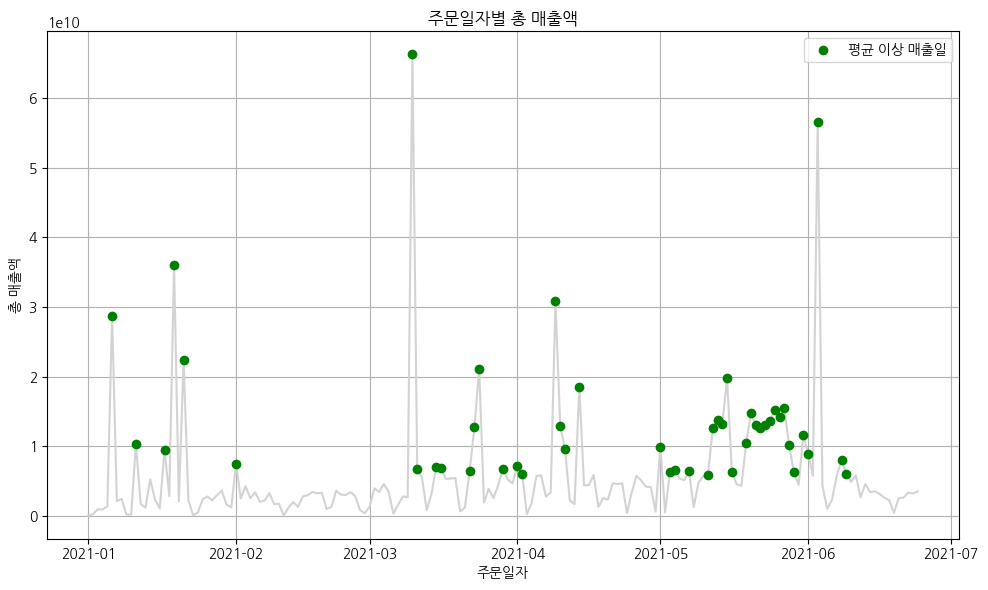

DatetimeIndex(['2021-01-06', '2021-01-11', '2021-01-17', '2021-01-19',
               '2021-01-21', '2021-02-01', '2021-03-10', '2021-03-11',
               '2021-03-15', '2021-03-16', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-29', '2021-04-01', '2021-04-02',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-14',
               '2021-05-01', '2021-05-03', '2021-05-04', '2021-05-07',
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
               '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-29', '2021-05-31', '2021-06-01', '2021-06-03',
               '2021-06-08', '2021-06-09'],
              dtype='datetime64[ns]', name='order_date', freq=None)


In [ ]:
# 평균 총 매출액 계산
mean_revenue = total_sales_by_date.mean()

# 평균 이상인 날짜 찾기
above_mean_dates = total_sales_by_date[total_sales_by_date >= mean_revenue].index

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(total_sales_by_date.index, total_sales_by_date, color='lightgrey')
plt.scatter(above_mean_dates, total_sales_by_date[above_mean_dates], color='green', label='평균 이상 매출일', zorder=5)

plt.title('주문일자별 총 매출액')
plt.xlabel('주문일자')
plt.ylabel('총 매출액')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(above_mean_dates)

```
5월에는 한달내내 평균 이상의 매출액을 기록하였습니다.
매달 1회 이상 매출액이 급상승하는 날짜가 있습니다.
```

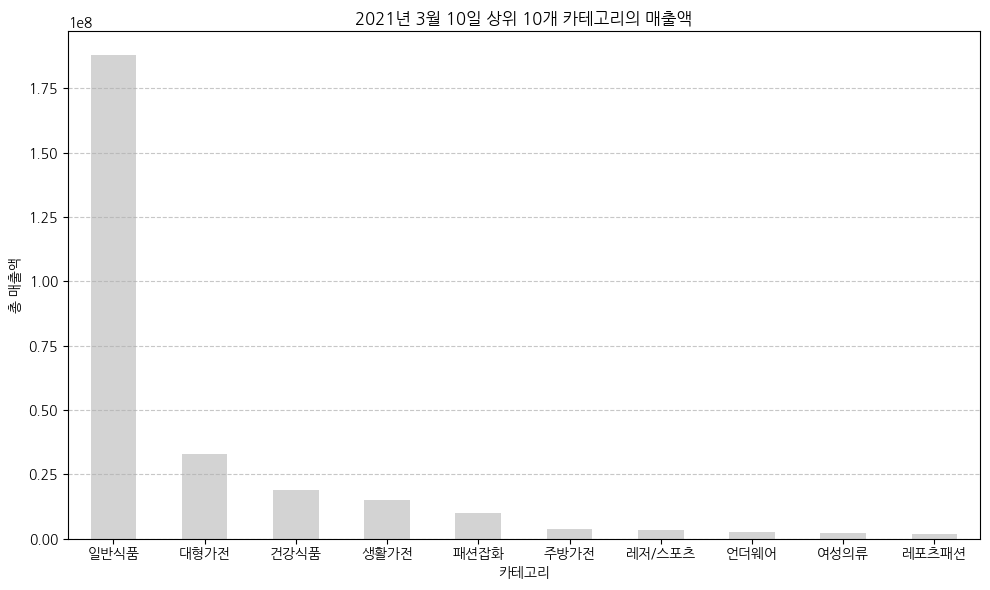

In [ ]:
# 2021년 3월 10일에 팔린 상품의 카테고리 확인
sales_on_date = merge_order[merge_order['order_date'] == '2021-03-10']
category_sales = sales_on_date.groupby('item_category')['paid_amount'].sum()

# 상위 10개 카테고리 선택
top_10_categories = category_sales.nlargest(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='lightgrey')
plt.title('2021년 3월 10일 상위 10개 카테고리의 매출액')
plt.xlabel('카테고리')
plt.ylabel('총 매출액')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

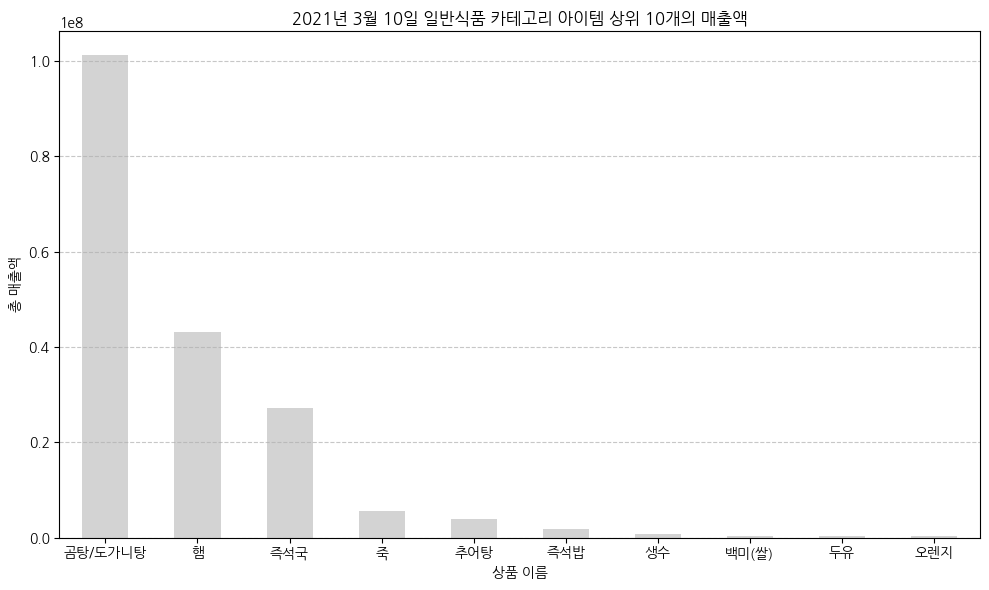

In [ ]:
# 2021년 3월 10일에 판매된 일반식품 카테고리의 데이터 필터링
sales_on_date_general = sales_on_date[sales_on_date['item_category'] == '일반식품']

# 하위 아이템의 매출액 상위 10개 구하기
top_10_items = sales_on_date_general.groupby('item_name')['paid_amount'].sum().nlargest(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
top_10_items.plot(kind='bar', color='lightgrey')
plt.title('2021년 3월 10일 일반식품 카테고리 아이템 상위 10개의 매출액')
plt.xlabel('상품 이름')
plt.ylabel('총 매출액')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

```
전체 주문 횟수를 봤을 때, '일반식품' 카테고리 내 최다 판매 품목은 생수였지만
최다 매출액을 달성한 날에는 '곰탕/도가니탕'이 가장 많이 팔린 것을 확인할 수 있습니다.
```

# Interpretation & Hypothesising


###Time Decay를 적용한 개인별 선호 아이템 구하기

####시간가중치 미적용 - 고객별 최다 구매 아이템 확인

In [ ]:
# 고객 단위로 아이템별 구매 건수 구하기
user_summary = df.groupby(['customer_no', 'item_name'])['order_no'].nunique().reset_index()
user_summary = user_summary.rename(columns={'order_no': 'cnt_order'})
user_summary.head(10)

,customer_no,item_name,cnt_order
0,2015010000596,도가니탕,1
1,2015010000596,혈당/혈압측정기,1
2,2015010000652,이온음료,1
3,2015010001152,닭고기(계육),1
4,2015010001152,도가니탕,2
5,2015010001152,사과,1
6,2015010001152,오메가3,1
7,2015010001152,크리스피롤,1
8,2015010001213,유산균,1
9,2015010001954,기모팬츠,1


In [ ]:
# 구매 건수가 많은 아이템별로 순위 매기기
user_summary['rn'] = user_summary.sort_values(by='cnt_order', ascending=False) \
             .groupby('customer_no') \
             .cumcount() + 1

user_summary.head(10)

,customer_no,item_name,cnt_order,rn
0,2015010000596,도가니탕,1,1
1,2015010000596,혈당/혈압측정기,1,2
2,2015010000652,이온음료,1,1
3,2015010001152,닭고기(계육),1,5
4,2015010001152,도가니탕,2,1
5,2015010001152,사과,1,4
6,2015010001152,오메가3,1,3
7,2015010001152,크리스피롤,1,2
8,2015010001213,유산균,1,1
9,2015010001954,기모팬츠,1,1


In [ ]:
# 최다 구매 아이템 정보만 남기기
user_max_item_info = user_summary[user_summary['rn'] == 1].reset_index(drop = True)
user_max_item_info.head()

,customer_no,item_name,cnt_order,rn
0,2015010000596,도가니탕,1,1
1,2015010000652,이온음료,1,1
2,2015010001152,도가니탕,2,1
3,2015010001213,유산균,1,1
4,2015010001954,기모팬츠,1,1


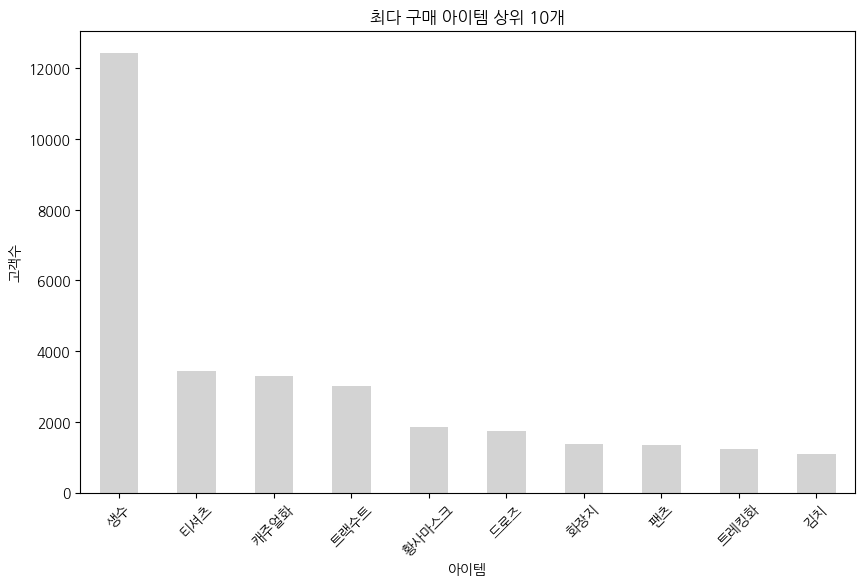

In [ ]:
# 아이템별 고객 수 합계
item_counts = user_max_item_info['item_name'].value_counts().head(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='lightgrey')
plt.title('최다 구매 아이템 상위 10개')
plt.xlabel('아이템')
plt.ylabel('고객수')
plt.xticks(rotation=45)
plt.show()

####시간가중치 적용 - 고객별 최대 구매 아이템 확인

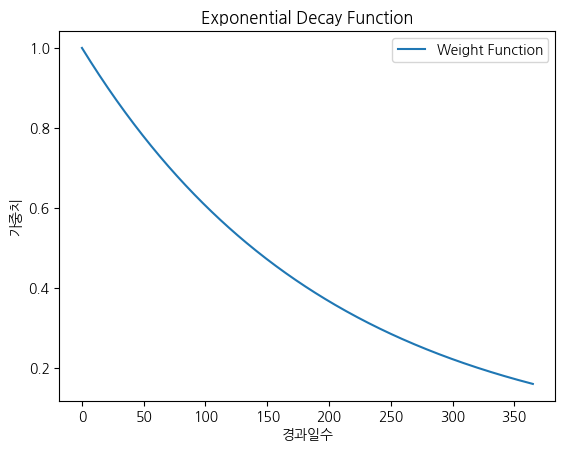

In [ ]:
# 경과일수 생성 (예: 0부터 365까지의 경과일수)
elapsed_days = np.arange(0, 366, 1)

# 가중치 계산 (0.995^경과일수)
weights = 0.995**elapsed_days

# 그래프 그리기
plt.plot(elapsed_days, weights, label='Weight Function')
plt.title('Exponential Decay Function')
plt.xlabel('경과일수')
plt.ylabel('가중치')
plt.legend()
plt.show()

In [ ]:
# 추천을 제공하는 날짜가 이 데이터의 가장 마지막 구매 일자의 다음 날이라고 가정(오래된 구매일 수록 가중치를 적용하기 위해)
recommend_date = df['order_date'].max() + pd.Timedelta(days=1)
print(recommend_date)

2021-06-25 00:00:00


In [ ]:
# 고객별 데이터 집계
decay_summary = df.groupby(['customer_no', 'order_date', 'item_name'])['order_no'].nunique().reset_index()
decay_summary = decay_summary.rename(columns={'order_no': 'cnt_order'})
decay_summary.head(10)

,customer_no,order_date,item_name,cnt_order
0,2015010000596,2021-01-15,도가니탕,1
1,2015010000596,2021-06-03,혈당/혈압측정기,1
2,2015010000652,2021-03-06,이온음료,1
3,2015010001152,2021-02-13,도가니탕,1
4,2015010001152,2021-02-18,도가니탕,1
5,2015010001152,2021-03-02,닭고기(계육),1
6,2015010001152,2021-03-23,사과,1
7,2015010001152,2021-04-24,오메가3,1
8,2015010001152,2021-05-25,크리스피롤,1
9,2015010001213,2021-02-25,유산균,1


In [ ]:
# 파라미터 설정 = 경과일수 변화에 미치는 영향도 설정
day_parameter = 0.995

# 시간가중치 적용 컬럼 생성
decay_summary['decay_day'] = day_parameter ** ((recommend_date - decay_summary['order_date']).dt.days)
decay_summary.head(10)

,customer_no,order_date,item_name,cnt_order,decay_day
0,2015010000596,2021-01-15,도가니탕,1,0.446186
1,2015010000596,2021-06-03,혈당/혈압측정기,1,0.895587
2,2015010000652,2021-03-06,이온음료,1,0.573274
3,2015010001152,2021-02-13,도가니탕,1,0.515996
4,2015010001152,2021-02-18,도가니탕,1,0.529092
5,2015010001152,2021-03-02,닭고기(계육),1,0.561894
6,2015010001152,2021-03-23,사과,1,0.624266
7,2015010001152,2021-04-24,오메가3,1,0.732877
8,2015010001152,2021-05-25,크리스피롤,1,0.856082
9,2015010001213,2021-02-25,유산균,1,0.547986


In [ ]:
# decay_day 집계
user_decay_summary = decay_summary.groupby(['customer_no', 'item_name']).agg(cnt_order = ('cnt_order', 'sum'),
                                                                             decay_day = ('decay_day', 'sum')).reset_index()

user_decay_summary.head(10)

,customer_no,item_name,cnt_order,decay_day
0,2015010000596,도가니탕,1,0.446186
1,2015010000596,혈당/혈압측정기,1,0.895587
2,2015010000652,이온음료,1,0.573274
3,2015010001152,닭고기(계육),1,0.561894
4,2015010001152,도가니탕,2,1.045088
5,2015010001152,사과,1,0.624266
6,2015010001152,오메가3,1,0.732877
7,2015010001152,크리스피롤,1,0.856082
8,2015010001213,유산균,1,0.547986
9,2015010001954,기모팬츠,1,0.564717


In [ ]:
# decay_day 값이 큰 아이템별로 순위 매기기
user_decay_summary['rn'] = user_decay_summary.sort_values(by='decay_day', ascending=False) \
             .groupby('customer_no') \
             .cumcount() + 1

user_decay_summary.head(10)

,customer_no,item_name,cnt_order,decay_day,rn
0,2015010000596,도가니탕,1,0.446186,2
1,2015010000596,혈당/혈압측정기,1,0.895587,1
2,2015010000652,이온음료,1,0.573274,1
3,2015010001152,닭고기(계육),1,0.561894,5
4,2015010001152,도가니탕,2,1.045088,1
5,2015010001152,사과,1,0.624266,4
6,2015010001152,오메가3,1,0.732877,3
7,2015010001152,크리스피롤,1,0.856082,2
8,2015010001213,유산균,1,0.547986,1
9,2015010001954,기모팬츠,1,0.564717,1


In [ ]:
# 시간 가중치를 적용한 최선호 구매 아이템 정보만 남기기
user_decay_item_info = user_decay_summary[user_decay_summary['rn'] == 1].reset_index(drop = True)
user_decay_item_info.head()

,customer_no,item_name,cnt_order,decay_day,rn
0,2015010000596,혈당/혈압측정기,1,0.895587,1
1,2015010000652,이온음료,1,0.573274,1
2,2015010001152,도가니탕,2,1.045088,1
3,2015010001213,유산균,1,0.547986,1
4,2015010001954,기모팬츠,1,0.564717,1


####시간가중치 적용과 미적용 데이터 비교

In [ ]:
# 두 데이터프레임 조인
merge_df = pd.merge(user_max_item_info, user_decay_item_info, on=['customer_no', 'rn'])

# 컬럼명 변경
merge_df = merge_df.rename(columns={'item_name_x': 'max_item_name', 'cnt_order_x': 'max_cnt_order',
                                    'item_name_y': 'decay_item_name', 'cnt_order_y': 'decay_cnt_order'})

# 'rn' 컬럼의 위치 조정
merge_df = merge_df[['customer_no', 'rn', 'max_item_name', 'max_cnt_order', 'decay_item_name', 'decay_cnt_order', 'decay_day']]
merge_df.head(10)

merge_df.head(10)

,customer_no,rn,max_item_name,max_cnt_order,decay_item_name,decay_cnt_order,decay_day
0,2015010000596,1,도가니탕,1,혈당/혈압측정기,1,0.895587
1,2015010000652,1,이온음료,1,이온음료,1,0.573274
2,2015010001152,1,도가니탕,2,도가니탕,2,1.045088
3,2015010001213,1,유산균,1,유산균,1,0.547986
4,2015010001954,1,기모팬츠,1,기모팬츠,1,0.564717
5,2015010004299,1,로봇청소기,1,로봇청소기,1,0.697047
6,2015010004451,1,패딩점퍼,1,여름팬츠,1,0.913725
7,2015010005813,1,기타 간편/즉석식품,1,기타 간편/즉석식품,1,0.834893
8,2015010008884,1,백미(쌀),3,백미(쌀),3,1.679469
9,2015010009464,1,티셔츠,1,티셔츠,1,0.900087


In [ ]:
# 두 기준으로 추출한 선호 아이템이 다른 고객만 필터링
diff_prefer_user = merge_df[merge_df['max_item_name'] != merge_df['decay_item_name']].reset_index(drop=True)
diff_prefer_user.sort_values(by='decay_day', ascending=False).head(50)

,customer_no,rn,max_item_name,max_cnt_order,decay_item_name,decay_cnt_order,decay_day
1204,2019074989618,1,일반세탁기,48,냉장고/냉동고,47,26.616036
1345,2019107337438,1,냉장고/냉동고,41,일반세탁기,39,23.508775
1203,2019074946712,1,냉장고/냉동고,48,일반세탁기,37,22.307060
1600,2020020542088,1,드럼세탁기,44,LED TV,42,13.791983
1775,2020046258294,1,핸디형청소기,17,일반압력밥솥,16,12.349917
2055,2020091115557,1,오메가3,47,남성건강기능식품,28,11.261258
2031,2020089023959,1,핸디형청소기,16,일반압력밥솥,13,10.783759
1783,2020047423925,1,루테인,35,오메가3,18,10.008312
2032,2020089024626,1,핸디형청소기,13,일반압력밥솥,11,9.576470
2183,2020113745154,1,곰탕/도가니탕,140,즉석국,50,7.089177


```
▶ 시간 가중치 적용 전 선호 아이템 :
추가 구매를 유도하기 위해 적극적인 프로모션 및 할인을 제공합니다. 시간이 지날수록 이러한 프로모션의 강도를 조절하거나 추가 혜택을 제공하여 고객의 관심을 유지합니다.
▶ 시간 가중치 적용 후 선호 아이템 :
아이템에 대한 정보를 소셜 미디어나 블로그 등을 통해 노출하고, 관련된 이벤트나 사용자 경험을 공유하여 고객의 관심을 유도합니다.


In [ ]:
# 주문 채널 컬럼을 추가
diff_prefer_user = pd.merge(diff_prefer_user, df2[['customer_no', 'channel']], on='customer_no')
diff_prefer_user.head(10)

,customer_no,rn,max_item_name,max_cnt_order,decay_item_name,decay_cnt_order,decay_day,channel
0,2015010000596,1,도가니탕,1,혈당/혈압측정기,1,0.895587,TV
1,2015010000596,1,도가니탕,1,혈당/혈압측정기,1,0.895587,TV
2,2015010000596,1,도가니탕,1,혈당/혈압측정기,1,0.895587,Mobile
3,2015010000596,1,도가니탕,1,혈당/혈압측정기,1,0.895587,Mobile
4,2015010004451,1,패딩점퍼,1,여름팬츠,1,0.913725,TV
5,2015010004451,1,패딩점퍼,1,여름팬츠,1,0.913725,TV
6,2015010004451,1,패딩점퍼,1,여름팬츠,1,0.913725,TV
7,2015010004451,1,패딩점퍼,1,여름팬츠,1,0.913725,TV
8,2015090646879,1,농축액,3,사과,3,2.487686,Mobile
9,2015090646879,1,농축액,3,사과,3,2.487686,Mobile


```
이용했던 채널을 고려한 프로모션 전략 수립이 필요할 것으로 판단됩니다.
```